<a href="https://colab.research.google.com/github/ArtyomShabunin/SMOPA-25/blob/main/lesson_10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img src="https://prana-system.com/files/110/rds_color_full.png" alt="tot image" width="300"  align="center"/> &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;
<img src="https://mpei.ru/AboutUniverse/OficialInfo/Attributes/PublishingImages/logo1.jpg" alt="mpei image" width="200" align="center"/>
<img src="https://mpei.ru/Structure/Universe/tanpe/structure/tfhe/PublishingImages/tot.png" alt="tot image" width="100"  align="center"/>

---

# **Системы машинного обучения и предиктивной аналитики в тепловой и возобновляемой энергетике**  

# ***Практические занятия***


---

# Занятие №10
# XGBoost
**23 апреля 2025г.**

XGBoost (Extreme Gradient Boosting) — это мощная и эффективная библиотека машинного обучения, основанная на методе **градиентного бустинга**. Она используется для решения задач классификации, регрессии и ранжирования.  

**Градиентный бустинг** — это техника **машинного обучения** для построения прогностических моделей. Она относится к классу **ансамблевых методов**, где несколько «слабых» моделей (обычно деревьев решений) объединяются в одну «сильную» модель.

Основная идея — строить модели **последовательно**, каждая из которых пытается **исправить ошибки** предыдущих, используя **градиентный спуск** для минимизации функции потерь.

### Основные особенности XGBoost:
- **Градиентный бустинг** — это метод ансамблирования, при котором несколько слабых моделей (обычно деревьев решений) объединяются для формирования сильной модели.
- **Эффективность** — XGBoost оптимизирован по скорости и использует продвинутые техники, такие как параллельные вычисления и буферизацию деревьев.
- **Поддержка регуляризации** — встроенная L1 и L2 регуляризация помогает предотвращать переобучение.
- **Обработка пропущенных значений** — библиотека умеет сама "угадывать", куда направить пропущенные значения при обучении деревьев.
- **Гибкость** — поддерживает различные типы задач, множество гиперпараметров, и может работать как с небольшими, так и с очень большими наборами данных.

### Где используется:
- Соревнования по машинному обучению (например, Kaggle)
- Финансовый анализ
- Диагностика в медицине
- Предиктивное обслуживание оборудования
- Маркетинговая аналитика

Cписок популярных альтернатив XGBoost — градиентного бустинга на решающих деревьях

1. **LightGBM (Microsoft)**
   - Быстрее XGBoost на больших данных.
   - Использует histogram-based алгоритм и leaf-wise рост дерева.
   - Хорош для задач с большим количеством признаков и категориальными данными.

2. **CatBoost (Yandex)**
   - Хорошо работает с категориальными признаками без необходимости one-hot encoding.
   - Снижает переобучение.
   - Прост в использовании: меньше параметров для настройки.

3. **HistGradientBoosting (sklearn)**
   - Встроенная реализация бустинга с гистограммами в Scikit-learn (`sklearn.ensemble.HistGradientBoostingClassifier/Regressor`).
   - Быстрый и поддерживает natively missing values.
   - Хорошая альтернатива без установки сторонних библиотек.


In [1]:
import numpy as np
import pandas as pd

from sklearn import preprocessing
from sklearn.model_selection import cross_val_predict, StratifiedKFold
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, ConfusionMatrixDisplay
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, r2_score
import matplotlib.pyplot as plt

import ipywidgets as widgets
from IPython.display import display, clear_output

from tqdm import tqdm

## Многоклассовая классификация с XGBoost
### Загрузка и предобработка данных

In [2]:
# import gdown
# import warnings
# warnings.filterwarnings('ignore')
# gdown.download('https://drive.google.com/uc?id=1j54o4pHTm3HvaYTEtv_i4hOJGy5yNeZZ', verify=False)

data = pd.read_parquet("./data_modes.gzip")

In [3]:
data.head()

,GTA1.DBinPU.Aldi,GTA1.DBinPU.Alvna,GTA1.DBinPU.Alzzo,GTA1.DBinPU.Bo,GTA1.DBinPU.DlPkf,GTA1.DBinPU.DlPtgft,GTA1.DBinPU.DlPvf,GTA1.DBinPU.fi,GTA1.DBinPU.hmGTD,GTA1.DBinPU.hmTG,...,heated_air,zzo_is_open,full_power_mode,partial_power_mode,increas_power_mode,decreas_power_mode,start_up_mode,shutdown_mode,stopped_state_mode,air_heating_mode
2023-02-26 06:59:50,225.550000,-4.398000,-0.082000,101.044,113.088000,33.709000,0.200000,56.615000,442.64,444.536,...,False,False,True,False,False,False,False,False,False,False
2023-02-26 07:00:00,225.610769,-4.327115,-0.089769,101.044,113.151231,33.709000,0.200000,56.615000,442.64,444.536,...,False,False,True,False,False,False,False,False,False,False
2023-02-26 07:00:10,225.436897,-4.363724,-0.091000,101.044,113.039759,33.633586,0.200207,56.516103,442.64,444.536,...,False,False,True,False,False,False,False,False,False,False
2023-02-26 07:00:20,225.710833,-4.306625,-0.093000,101.044,113.053458,33.506500,0.200750,56.376000,442.64,444.536,...,False,False,True,False,False,False,False,False,False,False
2023-02-26 07:00:30,226.355000,-4.183118,-0.091500,101.044,113.730941,33.818529,0.200000,56.199353,442.64,444.536,...,False,False,True,False,False,False,False,False,False,False


Признаки

In [4]:
use_columns = ['GTA1.DBinPU.Alzzo', 'GTA1.DBinPU.Bo', 'GTA1.DBinPU.DlPkf',
               'GTA1.DBinPU.DlPtgft', 'GTA1.DBinPU.DlPvf', 'GTA1.DBinPU.fi',
               'GTA1.DBinPU.hmGTD', 'GTA1.DBinPU.hmTG', 'GTA1.DBinPU.P1mvhTG',
               'GTA1.DBinPU.Pk', 'GTA1.DBinPU.Pmvh', 'GTA1.DBinPU.PmvhMOGTD',
               'GTA1.DBinPU.PmvhMOTG', 'GTA1.DBinPU.PmvyhMOGTD',
               'GTA1.DBinPU.PmvyhMOTG', 'GTA1.DBinPU.Prazrjag_navhode',
               'GTA1.DBinPU.Ptgpd', 'GTA1.DBinPU.Ptgvh', 'GTA1.DBinPU.Pvh',
               'GTA1.DBinPU.Pvyhlg', 'GTA1.DBinPU.Qtg', 'GTA1.DBinPU.Tk',
               'GTA1.DBinPU.Tn', 'GTA1.DBinPU.Tt', 'GTA1.DBinPU.Tvh1',
               'GTA1.DBinPU.Pzad']

X = data.loc[:,use_columns]

Целевая переменная

In [5]:
data['target'] = data[[
    'full_power_mode', 'partial_power_mode',
    'increas_power_mode', 'decreas_power_mode', 'start_up_mode',
    'shutdown_mode', 'stopped_state_mode']].idxmax(axis=1)
y = data.loc[:, ['target']]

In [6]:
y.value_counts()

,count
target,
full_power_mode,1045103
stopped_state_mode,26614
partial_power_mode,9547
shutdown_mode,347
start_up_mode,275
increas_power_mode,109
decreas_power_mode,103


Разделение на тестовую и тренировочную выборки

In [7]:
from sklearn.model_selection import train_test_split
# Разделяем с учетом дисбаланса классов
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42)

In [8]:
y_train.value_counts()

,count
target,
full_power_mode,836082
stopped_state_mode,21291
partial_power_mode,7638
shutdown_mode,278
start_up_mode,220
increas_power_mode,87
decreas_power_mode,82


In [9]:
y_test.value_counts()

,count
target,
full_power_mode,209021
stopped_state_mode,5323
partial_power_mode,1909
shutdown_mode,69
start_up_mode,55
increas_power_mode,22
decreas_power_mode,21


Балансировка данных

In [10]:
!pip install imblearn

Undersampling

In [11]:
from imblearn.under_sampling import RandomUnderSampler
sampling_strategy = {
    "full_power_mode": 1000,
    "stopped_state_mode": 1000,
    "partial_power_mode": 1000
}
rus = RandomUnderSampler(sampling_strategy=sampling_strategy, random_state=42)
X_train_resampled, y_train_resampled = rus.fit_resample(X_train, y_train)

In [12]:
y_train_resampled.value_counts()

,count
target,
full_power_mode,1000
stopped_state_mode,1000
partial_power_mode,1000
shutdown_mode,278
start_up_mode,220
increas_power_mode,87
decreas_power_mode,82


In [13]:
sampling_strategy = {
    "full_power_mode": 100,
    "stopped_state_mode": 100,
    "partial_power_mode": 100
}
rus = RandomUnderSampler(sampling_strategy=sampling_strategy, random_state=42)
X_test_resampled, y_test_resampled = rus.fit_resample(X_test, y_test)

In [14]:
y_test_resampled.value_counts()

,count
target,
full_power_mode,100
stopped_state_mode,100
partial_power_mode,100
shutdown_mode,69
start_up_mode,55
increas_power_mode,22
decreas_power_mode,21


Oversampling

In [15]:
from imblearn.over_sampling import SMOTE
X_train_resampled, y_train_resampled = SMOTE().fit_resample(X_train_resampled, y_train_resampled)

In [16]:
y_train_resampled.value_counts()

,count
target,
decreas_power_mode,1000
full_power_mode,1000
increas_power_mode,1000
partial_power_mode,1000
shutdown_mode,1000
start_up_mode,1000
stopped_state_mode,1000


XGBoost — это алгоритм на базе деревьев решений. А деревья решений и бустинг на их основе **не чувствительны к масштабу признаков** (в отличие от моделей типа линейной регрессии, SVM или нейронных сетей).

In [17]:
y_train_resampled

,target
0,decreas_power_mode
1,decreas_power_mode
2,decreas_power_mode
3,decreas_power_mode
4,decreas_power_mode
...,...
6995,start_up_mode
6996,start_up_mode
6997,start_up_mode
6998,start_up_mode


LabelEncoding

In [18]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [19]:
y_train_resampled_encoded = encoder.fit_transform(y_train_resampled.values[:,0])
y_test_resampled_encoded = encoder.transform(y_test_resampled.values[:,0])

In [20]:
y_test_resampled_encoded

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,

In [21]:
encoder.classes_

array(['decreas_power_mode', 'full_power_mode', 'increas_power_mode',
       'partial_power_mode', 'shutdown_mode', 'start_up_mode',
       'stopped_state_mode'], dtype=object)

### Инициализация и обучение модели

In [22]:
!pip install xgboost
import xgboost as xgb

`xgb.XGBClassifier` — это класс из библиотеки **XGBoost**, предназначенный для решения **задач классификации** с помощью алгоритма **градиентного бустинга на деревьях решений**.

- строит ансамбль деревьев решений (по умолчанию — деревья классификации),
- на каждом шаге добавляет дерево, которое исправляет ошибки предыдущих,
- минимизирует выбранную **функцию потерь (objective)**.

---

**Применяется для:**

- **Бинарной классификации** (например, "да/нет", "спам/не спам")
- **Многоклассовой классификации** (например, классификация цифр, видов растений и т.д.)

---

Параметр **`objective`** в XGBoost `XGBClassifier` определяет **функцию потерь**, которую оптимизирует модель, и напрямую зависит от типа задачи — классификация, регрессия, ранжирование и т.д.


---

**Для задач многоклассовой классификации:**

- `'multi:softmax'` — многоклассовая классификация, возвращает **номер класса** напрямую.  
  Требуется параметр `num_class`.
- `'multi:softprob'` — многоклассовая классификация, возвращает **вектор вероятностей по каждому классу**.  
  Также требует `num_class`.

---

**Описание остальных гиперпараметров:**

- **`num_class=7`**  
  Количество уникальных классов в задаче классификации. В данном случае — 7 классов.

- **`max_depth=6`**  
  Максимальная глубина каждого дерева.  
  Глубокие деревья могут моделировать сложные зависимости, но также повышают риск переобучения.

- **`learning_rate=0.1`**
  Скорость обучения, понижает вклад каждого дерева в итоговое решение.  
  Меньшие значения требуют больше деревьев (`n_estimators`) для хорошей сходимости.

- **`n_estimators=100`**  
  Количество деревьев (итераций бустинга).  
  Итоговая модель будет объединением этих 100 слабых моделей.

- **`subsample=0.8`**  
  Доля случайно выбранных объектов для обучения каждого дерева.  
  Значения <1.0 могут помочь в борьбе с переобучением.

- **`colsample_bytree=0.8`**  
  Доля случайно выбранных признаков, используемых при построении каждого дерева.  
  Также снижает риск переобучения, особенно при большом числе признаков.

- **`random_state=42`**  
  Фиксирует генератор случайных чисел, обеспечивая воспроизводимость результатов.


In [23]:
from sklearn.utils import shuffle

classifier = xgb.XGBClassifier(
    objective='multi:softmax',
    # objective='multi:softprob',
    num_class=7,
    max_depth=6,
    learning_rate=0.1,
    n_estimators=100,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42
)

X_shuffled, y_shuffled = shuffle(
    X_train_resampled, y_train_resampled_encoded, random_state=42)

classifier.fit(X_shuffled, y_shuffled)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.8, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=6, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None, num_class=7,
              num_parallel_tree=None, ...)

In [24]:
y_pred = classifier.predict(X_test_resampled)

In [25]:
y_pred

array([0, 2, 3, 0, 0, 0, 0, 0, 0, 0, 2, 0, 1, 0, 0, 0, 0, 1, 2, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 2, 2, 2, 3, 2, 2, 3, 2, 1, 2,
       2, 2, 2, 1, 2, 2, 2, 2, 3, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 0, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 5, 4, 4, 4, 4,
       4, 5, 4, 4, 0, 4, 4, 4, 4, 4, 5, 4, 4, 4, 4, 4, 4, 5, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,

In [26]:
classifier.predict_proba(X_test_resampled)

array([[9.82072175e-01, 1.63293742e-02, 7.14853930e-04, ...,
        2.22694813e-04, 1.88592618e-04, 1.78327871e-04],
       [3.54625960e-03, 8.80657881e-03, 9.85061467e-01, ...,
        4.59722156e-04, 9.89117194e-04, 4.24917554e-04],
       [3.12554598e-01, 5.82698791e-04, 5.23486501e-03, ...,
        6.86582061e-04, 8.09127872e-04, 5.61962428e-04],
       ...,
       [5.50228724e-05, 2.56497024e-05, 3.09919233e-05, ...,
        6.62082894e-05, 2.58244021e-04, 9.99535322e-01],
       [1.08127322e-04, 4.87013967e-05, 5.88446783e-05, ...,
        2.03534742e-04, 4.91958635e-04, 9.99030590e-01],
       [7.18484662e-05, 3.51849594e-05, 4.25131475e-05, ...,
        1.14368966e-04, 3.41831677e-04, 9.99354064e-01]], dtype=float32)

In [27]:
np.argmax(classifier.predict_proba(X_test_resampled), axis=1)
# np.max(classifier.predict_proba(X_test_resampled), axis=1)

array([0, 2, 3, 0, 0, 0, 0, 0, 0, 0, 2, 0, 1, 0, 0, 0, 0, 1, 2, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 2, 2, 2, 3, 2, 2, 3, 2, 1, 2,
       2, 2, 2, 1, 2, 2, 2, 2, 3, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 0, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 5, 4, 4, 4, 4,
       4, 5, 4, 4, 0, 4, 4, 4, 4, 4, 5, 4, 4, 4, 4, 4, 4, 5, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,

### Анализ качества модели
Матрица неточностей

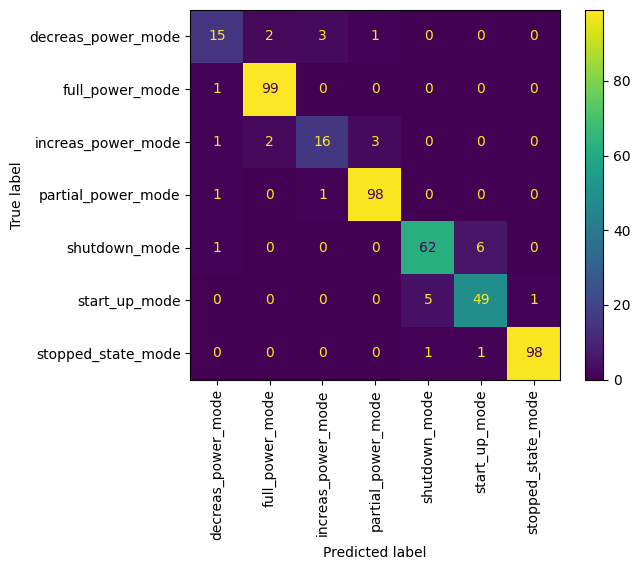

In [28]:
from sklearn.metrics import classification_report, confusion_matrix

conf_mat = confusion_matrix(y_test_resampled_encoded, y_pred)
ConfusionMatrixDisplay(conf_mat, display_labels=encoder.classes_).plot()
plt.xticks(rotation=90)
plt.show()

In [29]:
print(classification_report(y_test_resampled_encoded, y_pred, target_names=encoder.classes_))

                    precision    recall  f1-score   support

decreas_power_mode       0.79      0.71      0.75        21
   full_power_mode       0.96      0.99      0.98       100
increas_power_mode       0.80      0.73      0.76        22
partial_power_mode       0.96      0.98      0.97       100
     shutdown_mode       0.91      0.90      0.91        69
     start_up_mode       0.88      0.89      0.88        55
stopped_state_mode       0.99      0.98      0.98       100

          accuracy                           0.94       467
         macro avg       0.90      0.88      0.89       467
      weighted avg       0.93      0.94      0.93       467



### Подбор значений гиперпараметров
**RandomizedSearchCV**

In [30]:
from sklearn.model_selection import RandomizedSearchCV

# Создание модели XGB
classifier =  xgb.XGBClassifier(
    objective='multi:softmax', num_class=7, random_state=42)

# Сетка гиперпараметров
param_grid = {
    'max_depth': [4, 6, 8],
    'learning_rate': [0.01, 0.1, 0.2],
    'n_estimators': [100, 200],
    'subsample': [0.7, 0.8, 1.0],
    'colsample_bytree': [0.7, 0.8, 1.0]
}

# Использование RandomizedSearchCV для подбора параметров
random_search = RandomizedSearchCV(
    estimator=classifier, param_distributions=param_grid, n_iter=10, cv=5,
    n_jobs=-1, verbose=2, random_state=42)

# Обучение модели с RandomizedSearchCV
random_search.fit(X_shuffled, y_shuffled)

# Вывод лучших параметров
print("Лучшие параметры:", random_search.best_params_)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
Лучшие параметры: {'subsample': 1.0, 'n_estimators': 200, 'max_depth': 6, 'learning_rate': 0.2, 'colsample_bytree': 0.8}


In [31]:
# Оценка модели на тестовых данных
best_classifier = random_search.best_estimator_
# print("Точность на тестовой выборке:", best_classifier.score(X_test_resampled, y_test_resampled_encoded))
y_pred = best_classifier.predict(X_test_resampled)

### Анализ качества модели

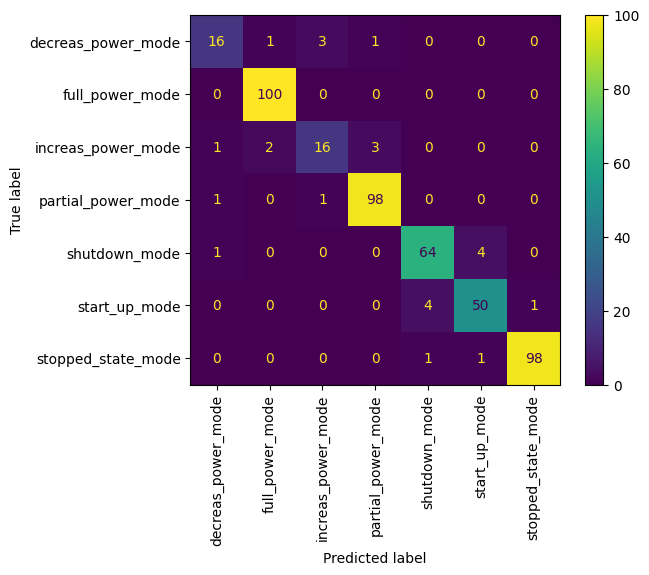

In [32]:
conf_mat = confusion_matrix(y_test_resampled_encoded, y_pred)
ConfusionMatrixDisplay(conf_mat, display_labels=encoder.classes_).plot()
plt.xticks(rotation=90)
plt.show()

In [33]:
print(classification_report(y_test_resampled_encoded, y_pred, target_names=encoder.classes_))

                    precision    recall  f1-score   support

decreas_power_mode       0.84      0.76      0.80        21
   full_power_mode       0.97      1.00      0.99       100
increas_power_mode       0.80      0.73      0.76        22
partial_power_mode       0.96      0.98      0.97       100
     shutdown_mode       0.93      0.93      0.93        69
     start_up_mode       0.91      0.91      0.91        55
stopped_state_mode       0.99      0.98      0.98       100

          accuracy                           0.95       467
         macro avg       0.91      0.90      0.91       467
      weighted avg       0.95      0.95      0.95       467



## Прогнозирование с XGBoost

In [34]:
# import gdown
# import warnings
# warnings.filterwarnings('ignore')
# url = "https://drive.google.com/drive/folders/1RtrAevJUYSgTbp0YUztxEBB8_VcvjgGH?usp=drive_link"
# gdown.download_folder(url, quiet=True, verify=False)

In [35]:
import glob
parquetFileList = glob.glob(f'./option_0/*.gzip')

In [36]:
df_list = []

for file in tqdm(parquetFileList):
    df = pd.read_parquet(file)
    df_list.append(df)

data = pd.concat(df_list, axis=0).sort_index().ffill().drop_duplicates()
data = data.dropna()

100%|██████████| 8/8 [00:02<00:00,  3.28it/s]


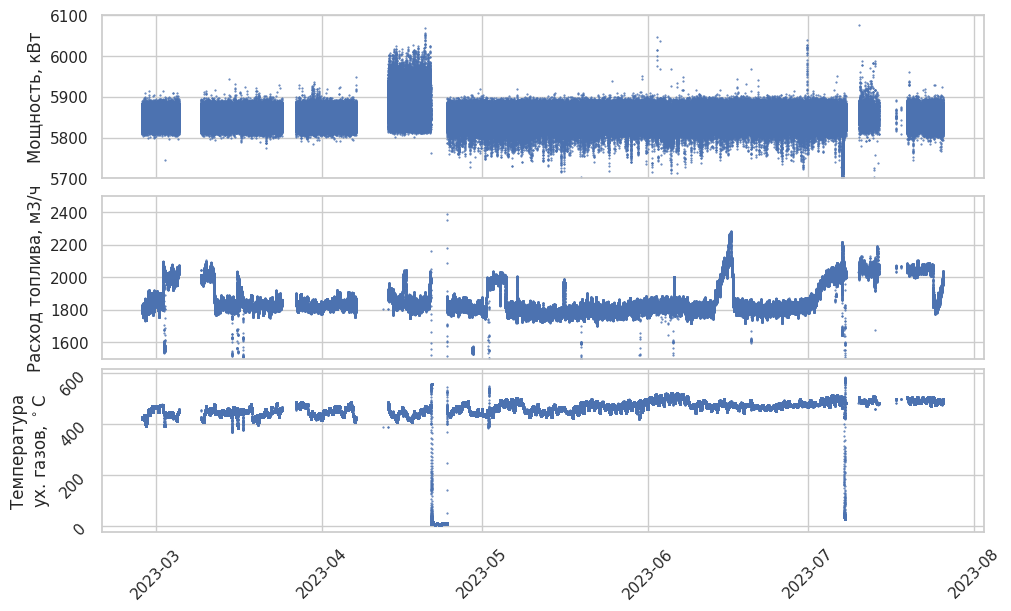

In [37]:
import seaborn as sns
sns.set_theme(style="whitegrid")

fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(10, 6), constrained_layout=True)

ax1.plot(data['GTA1.DBinPU.P'].index, data['GTA1.DBinPU.P'].values,
         linestyle='none', marker='.', markersize=1);
ax1.set_ylabel("Мощность, кВт");
ax1.set_ylim([5700,6100]);
ax1.tick_params(labelbottom=False)

ax2.plot(data['GTA1.DBinPU.Qtg'].index, data['GTA1.DBinPU.Qtg'].values,
         linestyle='none', marker='.', markersize=1);
ax2.set_ylabel("Расход топлива, м3/ч");
ax2.set_ylim([1500,2500]);
ax2.tick_params(labelbottom=False)

ax3.plot(data['GTA1.DBinPU.Tt'].index, data['GTA1.DBinPU.Tt'].values,
         linestyle='none', marker='.', markersize=1);
ax3.set_ylabel("Температура\nух. газов, $^\\circ$С");
# ax3.set_ylim([300,600]);
ax3.tick_params(rotation=45);

### Предобработка данных

Проредим и отфильтруем данные

In [38]:
df = pd.DataFrame(data['GTA1.DBinPU.Tt'])
df = df.resample('1h').mean()
df.columns = ['Tt']
df = df[df['Tt'] > 300]
df = df.resample('1h').asfreq()

In [39]:
df.shape

(3601, 1)

In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3601 entries, 2023-02-26 06:00:00 to 2023-07-26 06:00:00
Freq: h
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Tt      3050 non-null   float64
dtypes: float64(1)
memory usage: 56.3 KB


In [41]:
df[df['Tt'].isna()]

,Tt
2023-03-05 06:00:00,NaN
2023-03-05 07:00:00,NaN
2023-03-05 08:00:00,NaN
2023-03-05 09:00:00,NaN
2023-03-05 10:00:00,NaN
...,...
2023-07-19 04:00:00,NaN
2023-07-19 05:00:00,NaN
2023-07-19 06:00:00,NaN
2023-07-19 07:00:00,NaN


In [42]:
df.index.to_series().diff().max()

Timedelta('0 days 01:00:00')

In [43]:
df.loc['2023-03-05 01:00:00':'2023-03-05 08:00:00']

,Tt
2023-03-05 01:00:00,442.195003
2023-03-05 02:00:00,444.122162
2023-03-05 03:00:00,447.556457
2023-03-05 04:00:00,452.478640
2023-03-05 05:00:00,455.739461
2023-03-05 06:00:00,NaN
2023-03-05 07:00:00,NaN
2023-03-05 08:00:00,NaN


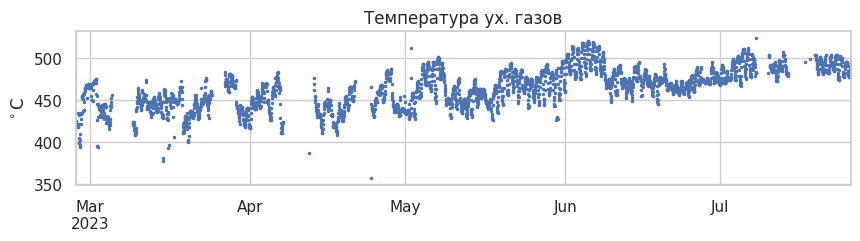

In [44]:
df.plot(style='.', figsize=(10, 2), ms=3, title="Температура ух. газов", legend=False)
plt.ylabel("$^\\circ$С")
plt.show()

**Лаги** — это **значения временного ряда на предыдущих временных шагах**, которые используются как признаки (фичи) для предсказания будущих значений.

Функция для генерации лагов

In [45]:
def create_lag_features(df, column, lags):
    """
    Создает лаги признака column в количестве lags и возвращает новый DataFrame.
    """
    df_lagged = df.copy()
    for lag in range(1, lags + 1):
        df_lagged[f"{column}_lag_{lag}"] = df_lagged[column].shift(lag)

    return df_lagged

In [46]:
n_lags = 24
df = create_lag_features(df, 'Tt', n_lags)

In [47]:
df.index.to_series().diff().max()

Timedelta('0 days 01:00:00')

In [48]:
df.shape

(3601, 25)

In [49]:
df.head()

,Tt,Tt_lag_1,Tt_lag_2,Tt_lag_3,Tt_lag_4,Tt_lag_5,Tt_lag_6,Tt_lag_7,Tt_lag_8,Tt_lag_9,...,Tt_lag_15,Tt_lag_16,Tt_lag_17,Tt_lag_18,Tt_lag_19,Tt_lag_20,Tt_lag_21,Tt_lag_22,Tt_lag_23,Tt_lag_24
2023-02-26 06:00:00,418.800000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2023-02-26 07:00:00,421.854112,418.800000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2023-02-26 08:00:00,425.267525,421.854112,418.800000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2023-02-26 09:00:00,425.640959,425.267525,421.854112,418.800000,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2023-02-26 10:00:00,422.100007,425.640959,425.267525,421.854112,418.8,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [50]:
df.dropna(inplace=True)

Создаем вектр признаков и вектор целевых значений

In [51]:
y = df.loc[:, ['Tt']]
X = df.loc[:, [col for col in df.columns if 'lag' in col]]

Разделим на тренировочную и тестовую выборки (**временной порядок важно сохранить!**)

In [52]:
train_size = int(len(df) * 0.8)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

### Инициализация и обучение модели

In [53]:
pred_model = xgb.XGBRegressor()
pred_model.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

Предсказание

In [54]:
y_pred = pred_model.predict(X_test)

baseline_pred = X_test.mean(axis=1).values

### Анализ качества модели

In [55]:
# Оценка
from sklearn.metrics import mean_squared_error

rmse = np.sqrt(mean_squared_error(y_test, y_pred))

baseline_rmse = np.sqrt(mean_squared_error(y_test, baseline_pred))

print("RMSE:", round(rmse, 3))
print("Baseline RMSE:", round(baseline_rmse, 3))

RMSE: 2.826
Baseline RMSE: 8.48


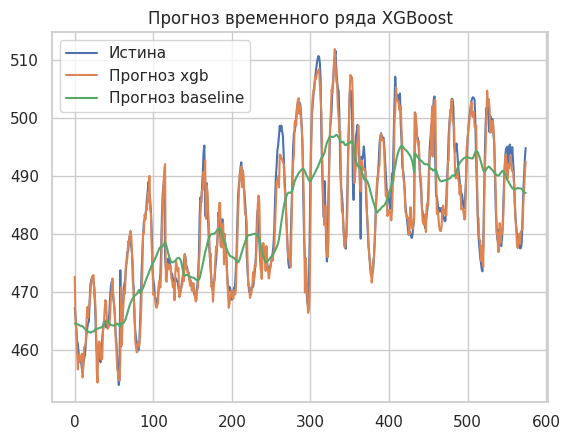

In [56]:
# Визуализация
plt.plot(y_test.values, label='Истина')
plt.plot(y_pred, label='Прогноз xgb')
plt.plot(baseline_pred, label='Прогноз baseline')
plt.legend()
plt.title("Прогноз временного ряда XGBoost")
plt.show()

### Автономный авторегрессионный прогноз (одна точка за раз)
На вход модели подаются предсказания, а не истинные значения из данных

In [57]:
start = X_test.index[0]
end = X_test.index[-1]
timestamps = pd.date_range(start=start, end=end, freq='1H')

<ipython-input-57-e0b40532a317>:3: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  timestamps = pd.date_range(start=start, end=end, freq='1H')


In [58]:
predictions = []
lags = X_test.iloc[0].values.tolist()  # первые лаги из начала теста

for _ in timestamps:
    # Прогноз
    y_pred = pred_model.predict(np.array([lags]))[0]
    predictions.append(y_pred)

    # Обновляем лаги: сдвигаем влево и добавляем новый прогноз
    lags = lags[1:] + [y_pred]

predictions = pd.DataFrame(predictions, index=timestamps, columns=['Tt'])

baseline_predictions = [X_test.iloc[0].mean() for _ in y_test.index]

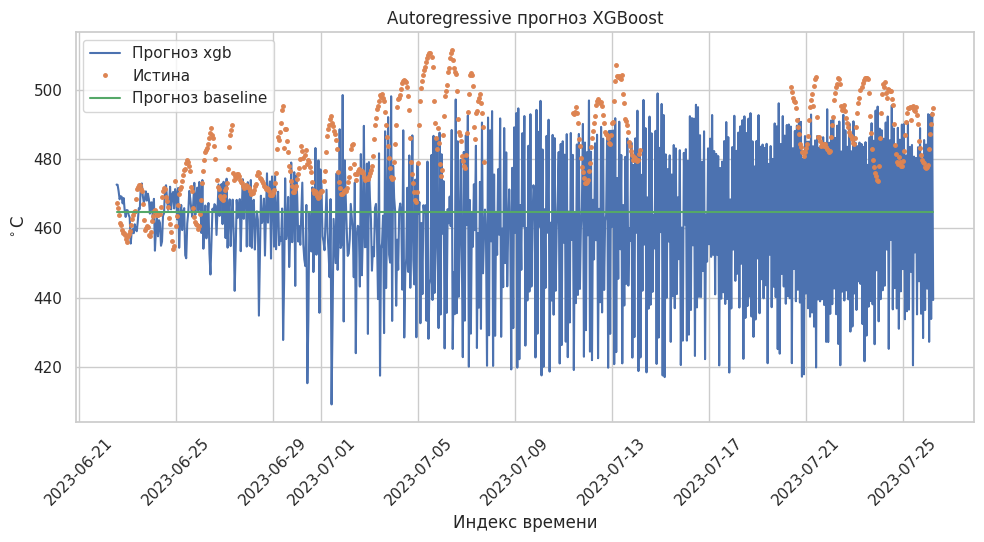

In [59]:
plt.figure(figsize=(10, 5))
plt.plot(timestamps, predictions['Tt'], label='Прогноз xgb')
plt.plot(df['Tt'].loc[start:].index, df['Tt'].loc[start:], linestyle='none', marker='.', markersize=5, label='Истина')
plt.plot(y_test.index, baseline_predictions, label='Прогноз baseline')

plt.ylabel("$^\\circ$С")
plt.title('Autoregressive прогноз XGBoost')
plt.xlabel('Индекс времени')
plt.legend()
plt.grid(True)
plt.tight_layout()

plt.xticks(rotation=45)
# plt.xlim([start, start + pd.Timedelta("4d")])

plt.show()

In [60]:
# Общие индексы
common_index = y_test.index.intersection(predictions.index)

In [61]:
rmse = np.sqrt(
    mean_squared_error(y_test.loc[common_index], predictions.loc[common_index]))

baseline_rmse = np.sqrt(mean_squared_error(y_test, baseline_predictions))

print("RMSE:", round(rmse, 3))
print("Baseline RMSE:", round(baseline_rmse, 3))

RMSE: 32.994
Baseline RMSE: 22.328


### Модель с множественным прогнозом (сразу n точек)

**sequence-to-sequence (seq2seq)** прогноз с XGBoost  
модель получает на вход `input_len` прошлых значений и предсказывает сразу `output_len` будущих

XGBoost **не поддерживает** напрямую многомерный выход, но можно сделать обучить `output_len` отдельных моделей, каждая из которых будет предсказывать своё значение


In [70]:
def make_seq2seq_dataset(series, input_len, output_len):
    X, Y = [], []
    for i in range(len(series) - input_len - output_len + 1):
        x_temp = series[i:i + input_len]
        y_temp = series[i + input_len:i + input_len + output_len]

        if x_temp.isna().any(): continue
        if y_temp.isna().any(): continue

        X.append(x_temp)
        Y.append(y_temp)

    return np.array(X), np.array(Y)

In [71]:
input_len = 20
output_len = 20
X, Y = make_seq2seq_dataset(
    df.resample('1h').asfreq()['Tt'],
    input_len=input_len, output_len=output_len)

In [72]:
X.shape, Y.shape

((2600, 20), (2600, 20))

In [73]:
X[0], Y[0]

(array([427.89169961, 433.45389439, 434.94451665, 435.40380167,
        452.94766703, 454.6168376 , 454.40054413, 455.43322453,
        456.80061197, 457.22453176, 451.90051803, 437.10264479,
        438.0155521 , 438.84740899, 448.09704101, 457.74038463,
        458.33222729, 460.54684883, 461.6638904 , 462.96702211]),
 array([464.60678181, 464.66273943, 465.77189343, 467.35231664,
        468.44005511, 468.42795843, 467.4678937 , 466.24691994,
        452.43033483, 466.21960405, 465.93509197, 465.97525023,
        467.48868378, 468.46202658, 468.46600245, 468.75017976,
        469.72054105, 465.39873324, 464.57180178, 464.67390051]))

Разделение на тестовую и тренировочную выборки

In [74]:
train_size = int(len(Y) * 0.8)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = Y[:train_size], Y[train_size:]

`MultiOutputRegressor`

Это **обёртка**, которая позволяет использовать любую обычную **регрессионную модель** (например, `XGBRegressor`, `RandomForestRegressor`, `LinearRegression`) для решения задач **многомерной регрессии** (multi-output regression).

In [75]:
from sklearn.multioutput import MultiOutputRegressor

model = MultiOutputRegressor(xgb.XGBRegressor())
model.fit(X_train, y_train)  # X_train: (n_samples, 20), y_train: (n_samples, 20)

MultiOutputRegressor(estimator=XGBRegressor(base_score=None, booster=None,
                                            callbacks=None,
                                            colsample_bylevel=None,
                                            colsample_bynode=None,
                                            colsample_bytree=None, device=None,
                                            early_stopping_rounds=None,
                                            enable_categorical=False,
                                            eval_metric=None,
                                            feature_types=None, gamma=None,
                                            grow_policy=None,
                                            importance_type=None,
                                            interaction_constraints=None,
                                            learning_rate=None, max_bin=None,
                                            max_cat_threshold=None,
                                            max_cat_to_onehot=None,
                                            max_delta_step=None, max_depth=None,
                                            max_leaves=None,
                                            min_child_weight=None, missing=nan,
                                            monotone_constraints=None,
                                            multi_strategy=None,
                                            n_estimators=None, n_jobs=None,
                                            num_parallel_tree=None,
                                            random_state=None, ...))

In [76]:
y_pred = model.predict(X_test)

In [77]:
baseline_pred = np.array([np.ones(output_len)*x.mean() for x in X_test])

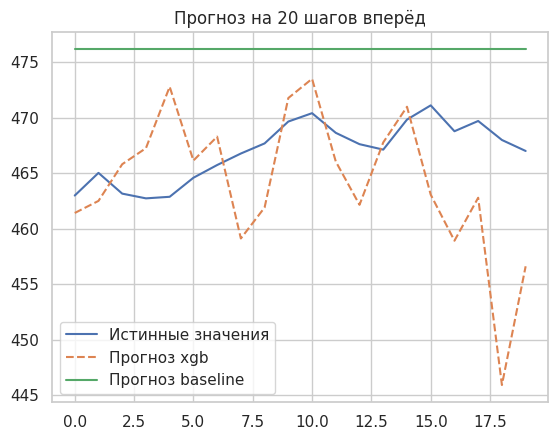

In [78]:
sample = 0

plt.plot(range(output_len), y_test[sample], label="Истинные значения")
plt.plot(range(output_len), y_pred[sample], label="Прогноз xgb", linestyle="--")
plt.plot(range(output_len), baseline_pred[sample], label='Прогноз baseline')
plt.legend()
plt.title(f"Прогноз на {output_len} шагов вперёд")
plt.show()

In [79]:
# np.sqrt(mean_squared_error(y_test[0], y_pred[0]))

In [80]:
# np.sqrt(mean_squared_error(y_test[0], baseline_pred[0]))

In [81]:
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

baseline_rmse = np.sqrt(mean_squared_error(y_test, baseline_pred))

print("RMSE:", round(rmse, 3))
print("Baseline RMSE:", round(baseline_rmse, 3))

RMSE: 11.365
Baseline RMSE: 9.057


### Автономный авторегрессионный прогноз с swq2seq моделью

In [82]:
start = df[df['Tt'] == y_test[0][0]].index[0]
end = df.index[-1]
timestamps = pd.date_range(start=start, end=end, freq='1h')

In [83]:
current_input = X_test[0]
predictions = []

# Сколько раз надо сделать предсказания
n_iters = (len(timestamps) - input_len) // output_len

In [84]:
for _ in range(n_iters):
    # Предсказание следующих значений
    pred = model.predict(np.array([current_input]))[0]
    predictions.extend(pred)

    # Обновляем вход: последние input_len предсказанных значений
    current_input = pred.tolist()[-input_len:]

In [85]:
predictions = pd.DataFrame(
    predictions,
    index=timestamps[:len(predictions)],
    columns=['Tt'])

In [86]:
# Общие индексы
common_index = df.index.intersection(predictions.index)

In [87]:
baseline_predictions = [X_test[0].mean() for _ in common_index]

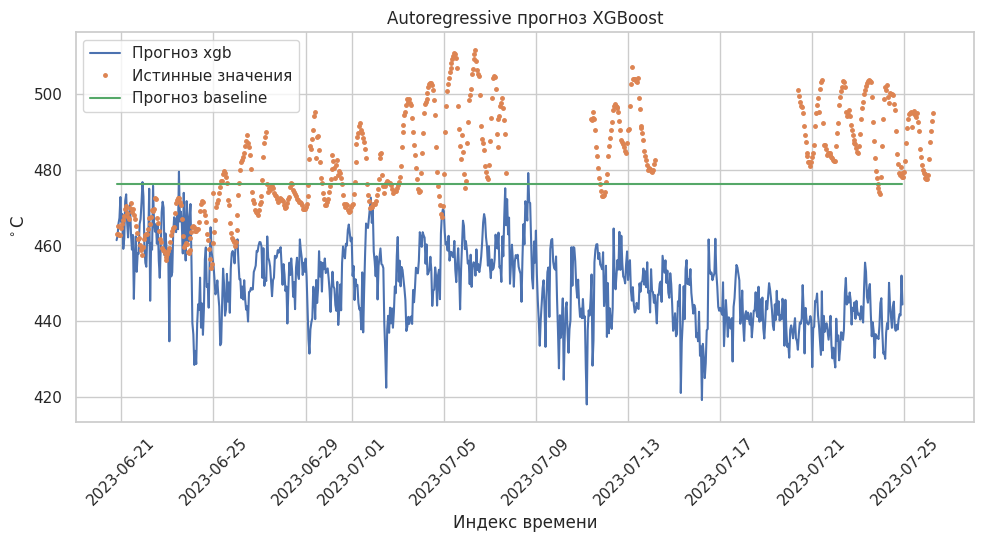

In [89]:
plt.figure(figsize=(10, 5))
plt.plot(
    predictions.index, predictions['Tt'], label="Прогноз xgb")
plt.plot(
    df['Tt'].loc[start:].index, df['Tt'].loc[start:],
    linestyle='none', marker='.', markersize=5,
    label="Истинные значения")
plt.plot(
    df['Tt'].loc[common_index].index, baseline_predictions,
    label='Прогноз baseline')

plt.ylabel("$^\\circ$С")
plt.title('Autoregressive прогноз XGBoost')
plt.xlabel('Индекс времени')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.xticks(rotation=45)

# plt.xlim([start, start + pd.Timedelta("4d")])

plt.show()

In [90]:
rmse = np.sqrt(
    mean_squared_error(
        df.loc[common_index, ['Tt']], predictions.loc[common_index]))

baseline_rmse = np.sqrt(
    mean_squared_error(df.loc[common_index, ['Tt']], baseline_predictions))

print("RMSE:", round(rmse, 3))
print("Baseline RMSE:", round(baseline_rmse, 3))

RMSE: 35.847
Baseline RMSE: 14.249
